In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('HumanActivity.csv').drop(columns='subject')
df.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [24]:
df['Activity'].value_counts()

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64

In [25]:
print(df.shape)

(7352, 562)


# 1 Filter Methods

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Separate features and target
X = df.drop('Activity', axis=1)
y = df['Activity']

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
print(X_train.shape)
print(X_test.shape)

(5881, 561)
(1471, 561)


# Applying Logistic Regression

In [28]:
# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if it doesn't converge
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.9809653297076818


# Removing Duplicate Columns

In [29]:
def get_duplicate_columns(df):
    
    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]

        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns

In [30]:
duplicate_columns = get_duplicate_columns(X_train)

In [31]:
duplicate_columns

{'tBodyAccMag-mean()': ['tBodyAccMag-sma()',
  'tGravityAccMag-mean()',
  'tGravityAccMag-sma()'],
 'tBodyAccMag-std()': ['tGravityAccMag-std()'],
 'tBodyAccMag-mad()': ['tGravityAccMag-mad()'],
 'tBodyAccMag-max()': ['tGravityAccMag-max()'],
 'tBodyAccMag-min()': ['tGravityAccMag-min()'],
 'tBodyAccMag-energy()': ['tGravityAccMag-energy()'],
 'tBodyAccMag-iqr()': ['tGravityAccMag-iqr()'],
 'tBodyAccMag-entropy()': ['tGravityAccMag-entropy()'],
 'tBodyAccMag-arCoeff()1': ['tGravityAccMag-arCoeff()1'],
 'tBodyAccMag-arCoeff()2': ['tGravityAccMag-arCoeff()2'],
 'tBodyAccMag-arCoeff()3': ['tGravityAccMag-arCoeff()3'],
 'tBodyAccMag-arCoeff()4': ['tGravityAccMag-arCoeff()4'],
 'tBodyAccJerkMag-mean()': ['tBodyAccJerkMag-sma()'],
 'tBodyGyroMag-mean()': ['tBodyGyroMag-sma()'],
 'tBodyGyroJerkMag-mean()': ['tBodyGyroJerkMag-sma()'],
 'fBodyAccMag-mean()': ['fBodyAccMag-sma()'],
 'fBodyBodyAccJerkMag-mean()': ['fBodyBodyAccJerkMag-sma()'],
 'fBodyBodyGyroMag-mean()': ['fBodyBodyGyroMag-sma()'

In [32]:
X_train[['tBodyAccMag-mean()','tBodyAccMag-sma()','tGravityAccMag-mean()','tGravityAccMag-sma()']]

,tBodyAccMag-mean(),tBodyAccMag-sma(),tGravityAccMag-mean(),tGravityAccMag-sma()
57,-0.997420,-0.997420,-0.997420,-0.997420
4154,-0.133797,-0.133797,-0.133797,-0.133797
6945,0.130528,0.130528,0.130528,0.130528
527,-0.955222,-0.955222,-0.955222,-0.955222
4196,-0.992499,-0.992499,-0.992499,-0.992499
...,...,...,...,...
5191,-0.372758,-0.372758,-0.372758,-0.372758
5226,-0.256033,-0.256033,-0.256033,-0.256033
5390,-0.434138,-0.434138,-0.434138,-0.434138
860,-0.983969,-0.983969,-0.983969,-0.983969


In [33]:
for one_list in duplicate_columns.values():
    X_train.drop(columns=one_list,inplace=True)
    X_test.drop(columns=one_list,inplace=True)

In [34]:
print(X_train.shape)
print(X_test.shape)

(5881, 540)
(1471, 540)


# 2. Variance Threshold


In [35]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.05)

In [36]:
sel.fit(X_train)

VarianceThreshold(threshold=0.05)

In [37]:
sum(sel.get_support())

349

In [38]:
columns = X_train.columns[sel.get_support()]

In [39]:
columns

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=349)

In [40]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [41]:
print(X_train.shape)
print(X_test.shape)

(5881, 349)
(1471, 349)


In [42]:
X_train.head()

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.994425,-0.994873,-0.994886,-0.994939,-0.993994,-0.995450,-0.938974,-0.577031,-0.813863,0.846922,...,0.394506,-0.684497,-0.901888,0.751089,0.626432,0.263401,-0.646225,0.398881,-0.546717,-0.431200
1,-0.326331,0.069663,-0.224321,-0.343326,0.039623,-0.256327,-0.310961,0.085617,-0.411806,0.271334,...,0.052089,-0.131946,-0.591721,0.628099,-0.357089,-0.925512,0.110212,-0.474013,0.383162,0.238969
2,-0.026220,-0.032163,0.393109,-0.118256,-0.030279,0.432861,0.370607,-0.072309,0.200747,0.118277,...,-0.038923,-0.643660,-0.935668,-0.182993,0.484857,-0.961034,0.147325,-0.819001,0.221549,-0.003571
3,-0.981092,-0.901124,-0.960423,-0.984417,-0.901405,-0.965788,-0.922291,-0.524676,-0.807362,0.825370,...,-0.145084,-0.326860,-0.645937,0.205896,-0.168239,-0.197557,0.328892,-0.744428,0.274256,0.031246
4,-0.997380,-0.983893,-0.984482,-0.997331,-0.985196,-0.983768,-0.942062,-0.564033,-0.810993,0.853330,...,0.096524,-0.113724,-0.445144,-0.267371,-0.304399,-0.081555,0.110146,-0.615329,0.322236,0.161577


# 3. Correlation

In [43]:
import seaborn as sns

<Axes: >

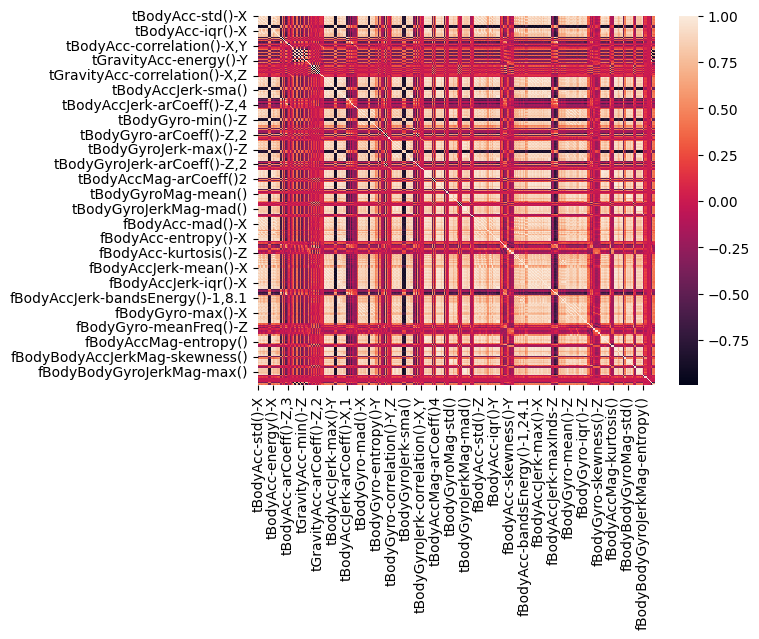

In [44]:
sns.heatmap(X_train.corr())

In [45]:
corr_matrix = X_train.corr()

In [46]:
# Get the column names of the DataFrame
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []

# Loop over the columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        # Access the cell of the DataFrame
        if corr_matrix.loc[columns[i], columns[j]] > 0.95:
            columns_to_drop.append(columns[j])

print(len(columns_to_drop))

1508


In [47]:
columns_to_drop = set(columns_to_drop)

In [48]:
len(columns_to_drop)

197

In [49]:
X_train.drop(columns = columns_to_drop, axis = 1, inplace=True)
X_test.drop(columns = columns_to_drop, axis = 1, inplace=True)

In [50]:
print(X_train.shape)
print(X_test.shape)

(5881, 152)
(1471, 152)


In [51]:
X_train

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,...,fBodyBodyGyroMag-skewness(),fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.994425,-0.994873,-0.994886,-0.813863,0.846922,0.691468,0.846423,-0.611174,-0.768785,-0.663066,...,0.043182,0.394506,-0.684497,0.751089,0.626432,0.263401,-0.646225,0.398881,-0.546717,-0.431200
1,-0.326331,0.069663,-0.224321,-0.411806,0.271334,0.039452,0.269204,0.403663,0.180054,0.176069,...,-0.225796,0.052089,-0.131946,0.628099,-0.357089,-0.925512,0.110212,-0.474013,0.383162,0.238969
2,-0.026220,-0.032163,0.393109,0.200747,0.118277,0.072295,0.245986,0.318557,0.135103,0.087680,...,-0.346388,-0.038923,-0.643660,-0.182993,0.484857,-0.961034,0.147325,-0.819001,0.221549,-0.003571
3,-0.981092,-0.901124,-0.960423,-0.807362,0.825370,0.642789,0.815368,-0.376515,-0.171730,-0.496816,...,0.197311,-0.145084,-0.326860,0.205896,-0.168239,-0.197557,0.328892,-0.744428,0.274256,0.031246
4,-0.997380,-0.983893,-0.984482,-0.810993,0.853330,0.687431,0.844895,-0.652548,-0.678458,-0.486837,...,0.310607,0.096524,-0.113724,-0.267371,-0.304399,-0.081555,0.110146,-0.615329,0.322236,0.161577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,-0.555352,-0.104055,-0.438064,-0.373579,0.454289,0.153427,0.475699,0.455070,0.288106,0.191017,...,-0.490616,0.022624,0.417731,-0.155279,-0.137981,0.929236,-0.583898,-0.703989,0.159112,-0.185944
5877,-0.290043,-0.212102,-0.469731,-0.123285,0.123907,0.202561,0.577615,0.345742,0.159941,0.085557,...,-0.846175,-0.039773,-0.021970,-0.019533,-0.896005,-0.039591,0.494178,-0.670139,0.106156,-0.220746
5878,-0.627198,-0.216566,-0.424764,-0.441355,0.530629,0.077330,0.469639,0.436434,0.322259,0.086872,...,-0.609038,0.094031,0.527152,-0.414621,-0.488542,0.095895,-0.297162,-0.856512,0.183547,-0.034939
5879,-0.994825,-0.985314,-0.965857,-0.805684,0.849776,0.688222,0.828575,-0.542681,-0.667647,-0.431412,...,-0.327943,0.539885,-0.889671,-0.079515,0.014291,-0.290347,0.602344,-0.839693,0.081388,-0.098270


# ANOVA

In [52]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest


sel = SelectKBest(f_classif, k=100).fit(X_train, y_train)

# display selected feature names
X_train.columns[sel.get_support()]

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y',
       'tBodyAcc-min()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-Y,Z',
       'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z',
       'tGravityAcc-sma()', 'tGravityAcc-energy()-Y', 'tGravityAcc-energy()-Z',
       'tGravityAcc-entropy()-X', 'tGravityAcc-entropy()-Y',
       'tGravityAcc-arCoeff()-Y,1', 'tGravityAcc-arCoeff()-Y,2',
       'tGravityAcc-arCoeff()-Z,1', 'tGravityAcc-arCoeff()-Z,2',
       'tGravityAcc-correlation()-Y,Z', 'tBodyAccJerk-std()-Z',
       'tBodyAccJerk-min()-X', 'tBodyAccJerk-min()-Y', 'tBodyAccJerk-min()-Z',
       'tBodyAccJerk-entropy()-X', 'tBodyAccJerk-arCoeff

In [53]:
columns = X_train.columns[sel.get_support()]

In [54]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [55]:
print(X_train.shape)
print(X_test.shape)

(5881, 100)
(1471, 100)


In [56]:
X_train.head()

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,...,fBodyGyro-meanFreq()-Z,"fBodyGyro-bandsEnergy()-1,8.1",fBodyAccMag-maxInds,fBodyBodyAccJerkMag-min(),fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyGyroMag-meanFreq(),"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.994425,-0.994873,-0.994886,-0.813863,0.846922,0.691468,0.846423,-0.611174,-0.768785,-0.663066,...,-0.158283,-0.999962,0.172414,-0.986305,0.132640,-0.690000,-0.024257,0.398881,-0.546717,-0.431200
1,-0.326331,0.069663,-0.224321,-0.411806,0.271334,0.039452,0.269204,0.403663,0.180054,0.176069,...,-0.315738,-0.898022,-0.517241,-0.718822,0.144767,-0.316666,0.191186,-0.474013,0.383162,0.238969
2,-0.026220,-0.032163,0.393109,0.200747,0.118277,0.072295,0.245986,0.318557,0.135103,0.087680,...,-0.071045,0.192158,-0.793103,-0.290424,-0.088077,-0.270995,-0.431985,-0.819001,0.221549,-0.003571
3,-0.981092,-0.901124,-0.960423,-0.807362,0.825370,0.642789,0.815368,-0.376515,-0.171730,-0.496816,...,-0.629423,-0.996263,-0.931034,-0.997886,-0.027783,-0.651181,-0.567748,-0.744428,0.274256,0.031246
4,-0.997380,-0.983893,-0.984482,-0.810993,0.853330,0.687431,0.844895,-0.652548,-0.678458,-0.486837,...,0.261846,-0.999927,-1.000000,-0.988139,0.668020,-0.598248,-0.257360,-0.615329,0.322236,0.161577


# Moment of Truth

In [57]:
# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if it doesn't converge
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.9687287559483345


#### Before 563 --> 98%
#### When we apply feature selection 
#### After 100 --> 98%

# Chi-square

In [58]:
titanic = sns.load_dataset('titanic')[['pclass','sex','sibsp','parch','embarked','survived']]

In [59]:
titanic.head()

,pclass,sex,sibsp,parch,embarked,survived
0,3,male,1,0,S,0
1,1,female,1,0,C,1
2,3,female,0,0,S,1
3,1,female,1,0,S,1
4,3,male,0,0,S,0


In [60]:
titanic

,pclass,sex,sibsp,parch,embarked,survived
0,3,male,1,0,S,0
1,1,female,1,0,C,1
2,3,female,0,0,S,1
3,1,female,1,0,S,1
4,3,male,0,0,S,0
...,...,...,...,...,...,...
886,2,male,0,0,S,0
887,1,female,0,0,S,1
888,3,female,1,2,S,0
889,1,male,0,0,C,1


In [61]:
ct = pd.crosstab(titanic['survived'],titanic['sex'],margins=True)
ct

sex,female,male,All
survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [62]:
from scipy.stats import chi2_contingency
chi2_contingency(ct)

Chi2ContingencyResult(statistic=263.05057407065567, pvalue=1.0036732821369115e-55, dof=4, expected_freq=array([[193.47474747, 355.52525253, 549.        ],
       [120.52525253, 221.47474747, 342.        ],
       [314.        , 577.        , 891.        ]]))

In [63]:
score = []

for feature in titanic.columns[:-1]:
    
    # create contingency table
    ct = pd.crosstab(titanic['survived'], titanic[feature])
    
    # chi_test
    p_value = chi2_contingency(ct)[1]
    score.append(p_value)

<Axes: >

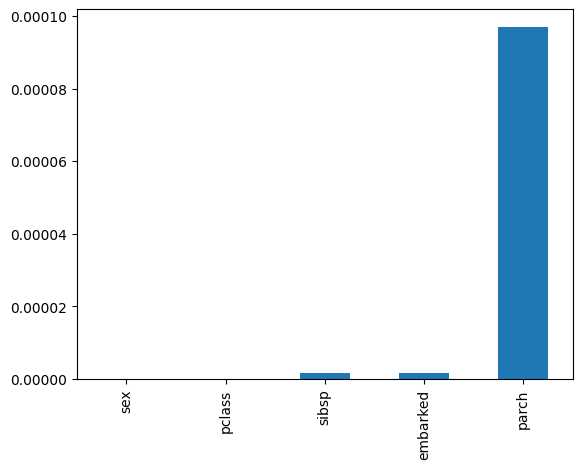

In [64]:
pd.Series(score, index=titanic.columns[:-1]).sort_values(ascending=True).plot(kind='bar')

In [65]:
# 2nd method to calculate chi-square

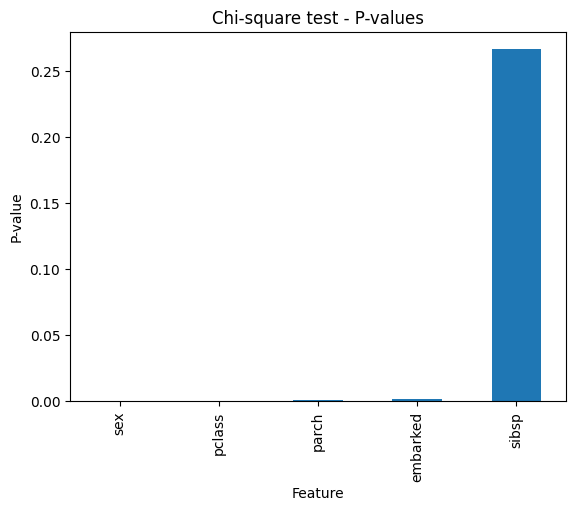

In [66]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt

# assuming titanic is your DataFrame and 'Survived' is the target column

# Encode categorical variables
le = LabelEncoder()
titanic_encoded = titanic.apply(le.fit_transform)

X = titanic_encoded.drop('survived', axis=1)
y = titanic_encoded['survived']

# Calculate chi-squared stats
chi_scores = chi2(X, y)

# chi_scores[1] are the p-values of each feature.
p_values = pd.Series(chi_scores[1], index = X.columns)
p_values.sort_values(inplace = True)

# Plotting the p-values
p_values.plot.bar()

plt.title('Chi-square test - P-values')
plt.xlabel('Feature')
plt.ylabel('P-value')

plt.show()

# Wrapper Methods

In [67]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.model_selection import cross_val_score

In [68]:
!pip install --upgrade scikit-learn mlxtend

In [69]:
df = pd.read_csv('iris.csv')

In [70]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [71]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

lr = LogisticRegression()

sel = EFS(lr, max_features=4, scoring='accuracy', cv=5)

In [72]:
model = sel.fit(df.iloc[:,:4],df['species'])

c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packa

In [73]:
model.best_score_

0.9733333333333334

In [74]:
model.best_feature_names_

('sepal_length', 'sepal_width', 'petal_length', 'petal_width')

In [75]:
# detailed output

In [76]:
model.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.66666667, 0.73333333, 0.76666667, 0.76666667, 0.83333333]),
  'avg_score': 0.7533333333333333,
  'feature_names': ('sepal_length',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.53333333, 0.56666667, 0.53333333, 0.53333333, 0.63333333]),
  'avg_score': 0.5599999999999999,
  'feature_names': ('sepal_width',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.93333333, 1.        , 0.9       , 0.93333333, 1.        ]),
  'avg_score': 0.9533333333333334,
  'feature_names': ('petal_length',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([1.        , 0.96666667, 0.9       , 0.93333333, 1.        ]),
  'avg_score': 0.96,
  'feature_names': ('petal_width',)},
 4: {'feature_idx': (0, 1),
  'cv_scores': array([0.73333333, 0.83333333, 0.76666667, 0.86666667, 0.9       ]),
  'avg_score': 0.8200000000000001,
  'feature_names': ('sepal_length', 'sepal_width')},
 5: {'feature_idx': (0, 2),
  'cv_scores': array([0.93333333, 1.        , 0.9   

In [77]:
metric_df = pd.DataFrame.from_dict(model.get_metric_dict()).T
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.6666666666666666, 0.7333333333333333, 0.766...",0.753333,"(sepal_length,)",0.069612,0.05416,0.02708
1,"(1,)","[0.5333333333333333, 0.5666666666666667, 0.533...",0.56,"(sepal_width,)",0.049963,0.038873,0.019437
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal_length,)",0.051412,0.04,0.02
3,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal_width,)",0.049963,0.038873,0.019437
4,"(0, 1)","[0.7333333333333333, 0.8333333333333334, 0.766...",0.82,"(sepal_length, sepal_width)",0.079462,0.061824,0.030912
5,"(0, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_length, petal_length)",0.051412,0.04,0.02
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,"(sepal_length, petal_width)",0.034274,0.026667,0.013333
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_width, petal_length)",0.051412,0.04,0.02
8,"(1, 3)","[0.9333333333333333, 0.9666666666666667, 0.9, ...",0.94,"(sepal_width, petal_width)",0.032061,0.024944,0.012472
9,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal_length, petal_width)",0.032061,0.024944,0.012472


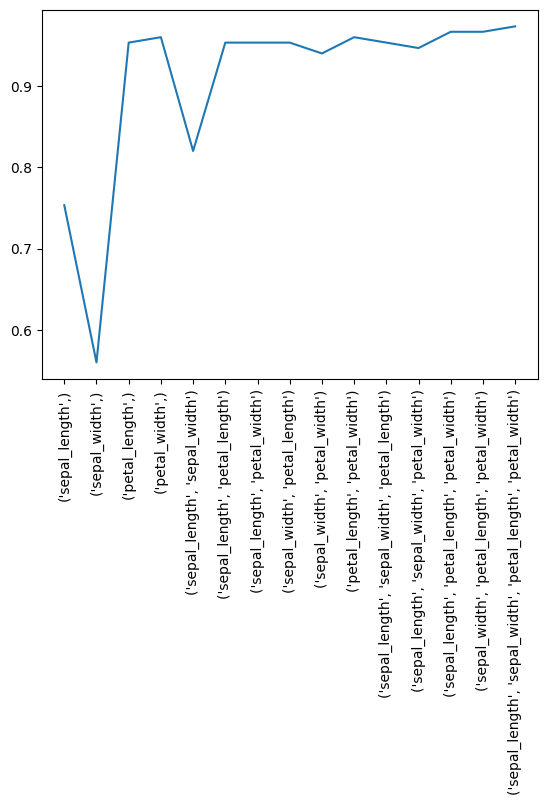

In [78]:
import matplotlib.pyplot as plt

plt.plot([str(k) for k in metric_df['feature_names']],metric_df['avg_score'])
plt.xticks(rotation=90)
plt.show()

# Regression Example

In [79]:
df = pd.read_csv('BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['medv'], test_size=0.2, random_state=1)

In [81]:
print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


In [82]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
42,0.14150,0.0,6.91,0,0.448,6.169,6.6,5.7209,3,233,17.9,383.37,5.81
58,0.15445,25.0,5.13,0,0.453,6.145,29.2,7.8148,8,284,19.7,390.68,6.86
385,16.81180,0.0,18.10,0,0.700,5.277,98.1,1.4261,24,666,20.2,396.90,30.81
78,0.05646,0.0,12.83,0,0.437,6.232,53.7,5.0141,5,398,18.7,386.40,12.34
424,8.79212,0.0,18.10,0,0.584,5.565,70.6,2.0635,24,666,20.2,3.65,17.16


In [83]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [84]:
# baseline model
import numpy as np
from sklearn.metrics import r2_score
model = LinearRegression()


print("training",np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='r2')))

training 0.7025123301096213
testing 0.6514899901155404


In [85]:
lr = LinearRegression()

exh = EFS(lr, max_features=13, scoring='r2', cv=10, print_progress=True,n_jobs=-1)

sel = exh.fit(X_train, y_train)

Features: 8191/8191

In [86]:
sel.best_score_

0.6827988156800063

In [87]:
sel.best_feature_names_

('0', '1', '4', '5', '7', '8', '9', '10', '11', '12')

In [88]:
metric_df = pd.DataFrame.from_dict(sel.get_metric_dict()).T
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.03941987916919132, 0.12695789031653215, -0....",0.129009,"(0,)",0.064226,0.086475,0.028825
1,"(1,)","[0.14236716209182754, -0.10598329567838705, 0....",0.100963,"(1,)",0.076751,0.103339,0.034446
2,"(2,)","[0.4055276765549376, 0.0029283993633670846, -0...",0.210465,"(2,)",0.139709,0.188107,0.062702
3,"(3,)","[-0.07110886674980432, -0.08269807310551558, 0...",-0.025663,"(3,)",0.055426,0.074627,0.024876
4,"(4,)","[0.18869831316675, 0.03113193162308736, 0.0348...",0.17746,"(4,)",0.114827,0.154605,0.051535
...,...,...,...,...,...,...,...
8186,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8791441026861514, 0.576226384714265, 0.4354...",0.679213,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.096133,0.129436,0.043145
8187,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8731761731752511, 0.5384374917854684, 0.458...",0.679018,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.098986,0.133276,0.044425
8188,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8494627278072393, 0.5454006150975994, 0.444...",0.66547,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.099036,0.133343,0.044448
8189,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8358451877451422, 0.5448662375728606, 0.449...",0.670075,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.094633,0.127415,0.042472


In [89]:
def adjust_r2(r2, num_examples, num_features):
    coef = (num_examples - 1) / (num_examples - num_features - 1) 
    return 1 - (1 - r2) * coef


In [90]:
metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjust_r2(metric_df['avg_score'],metric_df['observations'],metric_df['num_features'])

In [91]:
metric_df.sort_values('adjusted_r2',ascending=False)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjusted_r2
7975,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.8855189158291968, 0.5742220049707852, 0.437...",0.682799,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.096995,0.130595,0.043532,404,10,0.674728
7408,"(0, 1, 4, 5, 7, 8, 9, 10, 12)","[0.8717831363927702, 0.5819307800982585, 0.462...",0.680483,"(0, 1, 4, 5, 7, 8, 9, 10, 12)",0.090811,0.122269,0.040756,404,9,0.673185
8141,"(0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12)","[0.8792702841985806, 0.5752245789381261, 0.438...",0.681125,"(0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12)",0.096068,0.129348,0.043116,404,11,0.672177
8150,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.8734082301119797, 0.538138251576179, 0.4610...",0.680994,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.098795,0.133019,0.04434,404,11,0.672043
8153,"(0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8853169531726776, 0.5751761822045902, 0.434...",0.680914,"(0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.097075,0.130703,0.043568,404,11,0.67196
...,...,...,...,...,...,...,...,...,...,...
53,"(3, 11)","[0.07227421305699011, -0.026141441832760126, 0...",0.073485,"(3, 11)",0.069934,0.09416,0.031387,404,2,0.068864
11,"(11,)","[0.1200629474726852, 0.03143835749752166, -0.0...",0.068712,"(11,)",0.071116,0.095752,0.031917,404,1,0.066396
49,"(3, 7)","[-0.0371219722713414, -0.1671760395427997, 0.0...",0.057453,"(3, 7)",0.09446,0.127183,0.042394,404,2,0.052752
7,"(7,)","[0.004822573124353857, -0.09518844023749029, -...",0.038815,"(7,)",0.066813,0.089958,0.029986,404,1,0.036424


In [92]:
X_train_sel = sel.transform(X_train)
X_test_sel = sel.transform(X_test)

In [93]:
model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test_sel, y_test, cv=5, scoring='r2')))

training 0.7100327839218562
testing 0.7205819296124483


[mlxtend ](https://rasbt.github.io/mlxtend/)

## Sequential Backward Elimination

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import numpy as np
# load the dataset
data = pd.read_csv('BostonHousing.csv')

# separate the target variable
X = data.drop("medv", axis=1)
y = data['medv']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape)

(404, 13)


In [95]:
from sklearn.metrics import r2_score

In [96]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [97]:
model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='r2')))

training 0.7025123301096213
testing 0.6514899901155404


In [104]:
lr = LinearRegression()

# perform backward elimination
sfs = SFS(lr, k_features='best', forward=False, floating=False, scoring='r2',cv=5)

sfs.fit(X_train, y_train)

c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packa

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(1, 13), scoring='r2')

In [105]:
sfs.k_feature_idx_

(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)

In [106]:
metric_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjust_r2(metric_df['avg_score'],metric_df['observations'],metric_df['num_features'])

metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjusted_r2
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7535027170817178, 0.6920238509138777, 0.682...",0.702512,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.038207,0.029727,0.014863,404,13,0.692596
12,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7532855958710695, 0.6944570477695307, 0.693...",0.70581,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.035641,0.02773,0.013865,404,12,0.696781
11,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.754710892556849, 0.6959627893665097, 0.7017...",0.708109,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.035367,0.027516,0.013758,404,11,0.699918
10,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7769593921905563, 0.6884741223718953, 0.702...",0.710033,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.046075,0.035848,0.017924,404,10,0.702654
9,"(0, 1, 4, 5, 7, 8, 9, 10, 12)","[0.7706104220711025, 0.6854023389684323, 0.690...",0.704324,"(0, 1, 4, 5, 7, 8, 9, 10, 12)",0.046449,0.036139,0.018069,404,9,0.69757
8,"(0, 1, 4, 5, 7, 8, 10, 12)","[0.7681719744800458, 0.6822126526818693, 0.670...",0.697727,"(0, 1, 4, 5, 7, 8, 10, 12)",0.04882,0.037984,0.018992,404,8,0.691605
7,"(0, 1, 4, 5, 7, 10, 12)","[0.7671638009750725, 0.6812300799626649, 0.661...",0.692234,"(0, 1, 4, 5, 7, 10, 12)",0.051644,0.040181,0.02009,404,7,0.686794
6,"(1, 4, 5, 7, 10, 12)","[0.7519120213497091, 0.6756087674652564, 0.646...",0.686004,"(1, 4, 5, 7, 10, 12)",0.046845,0.036447,0.018224,404,6,0.681258
5,"(4, 5, 7, 10, 12)","[0.7525552802357769, 0.6665033988504306, 0.639...",0.681065,"(4, 5, 7, 10, 12)",0.051233,0.039861,0.019931,404,5,0.677058
4,"(5, 7, 10, 12)","[0.7384743962575444, 0.640118850766883, 0.5873...",0.662544,"(5, 7, 10, 12)",0.063384,0.049315,0.024658,404,4,0.659161


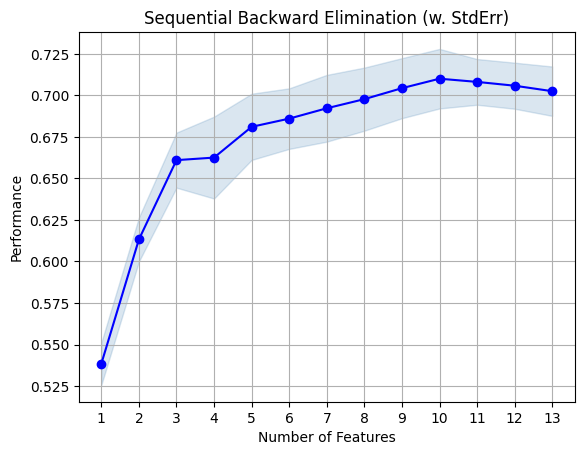

In [107]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err',)

plt.title('Sequential Backward Elimination (w. StdErr)')
plt.grid()
plt.show()

In [108]:
X_train_sel = sfs.transform(X_train)
X_test_sel = sfs.transform(X_test)

model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test_sel, y_test, cv=5, scoring='r2')))

training 0.7100327839218562
testing 0.7205819296124483


In [109]:
X_train_sel.shape

(404, 10)

## forward 

In [110]:
lr = LinearRegression()

# perform backward elimination
sfs = SFS(lr, k_features='best', forward=True, floating=False, scoring='r2',cv=5)

sfs.fit(X_train, y_train)

c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packa

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 13),
                          scoring='r2')

In [111]:
sfs.k_feature_idx_



(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)

In [112]:
metric_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjust_r2(metric_df['avg_score'],metric_df['observations'],metric_df['num_features'])

metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjusted_r2
1,"(12,)","[0.5472998394577442, 0.49002001493399727, 0.53...",0.538451,"(12,)",0.032755,0.025485,0.012742,404,1,0.537303
2,"(5, 12)","[0.6330856272904802, 0.5779812120755249, 0.586...",0.613259,"(5, 12)",0.034066,0.026505,0.013252,404,2,0.61133
3,"(5, 10, 12)","[0.7215896884753017, 0.6288372046797153, 0.633...",0.661012,"(5, 10, 12)",0.04259,0.033136,0.016568,404,3,0.65847
4,"(5, 10, 11, 12)","[0.725877216548624, 0.6342604286872173, 0.6558...",0.667383,"(5, 10, 11, 12)",0.039611,0.030819,0.01541,404,4,0.664048
5,"(5, 7, 10, 11, 12)","[0.7440756174774326, 0.6473449858158777, 0.614...",0.671496,"(5, 7, 10, 11, 12)",0.055057,0.042836,0.021418,404,5,0.667369
6,"(4, 5, 7, 10, 11, 12)","[0.7554472741494642, 0.6695521143038103, 0.653...",0.68562,"(4, 5, 7, 10, 11, 12)",0.047626,0.037054,0.018527,404,6,0.680869
7,"(1, 4, 5, 7, 10, 11, 12)","[0.7548843433907461, 0.6798073590310516, 0.662...",0.6913,"(1, 4, 5, 7, 10, 11, 12)",0.042762,0.03327,0.016635,404,7,0.685844
8,"(0, 1, 4, 5, 7, 10, 11, 12)","[0.7678201537729974, 0.6827004362205138, 0.671...",0.695442,"(0, 1, 4, 5, 7, 10, 11, 12)",0.048774,0.037948,0.018974,404,8,0.689274
9,"(0, 1, 4, 5, 7, 8, 10, 11, 12)","[0.7746648196407366, 0.6850585456872307, 0.683...",0.703763,"(0, 1, 4, 5, 7, 8, 10, 11, 12)",0.04762,0.03705,0.018525,404,9,0.696996
10,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7769593921905563, 0.6884741223718953, 0.702...",0.710033,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.046075,0.035848,0.017924,404,10,0.702654


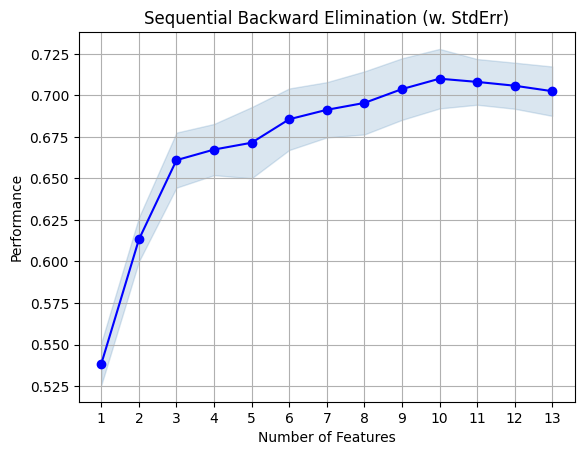

In [113]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err',)

plt.title('Sequential Backward Elimination (w. StdErr)')
plt.grid()
plt.show()

In [114]:
X_train_sel = sfs.transform(X_train)
X_test_sel = sfs.transform(X_test)

model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test_sel, y_test, cv=5, scoring='r2')))

training 0.7100327839218562
testing 0.7205819296124483


In [115]:
X_train_sel.shape

(404, 10)

### using sklearn

In [116]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS


sfs2 = SFS(model,
           n_features_to_select=5,
           direction='forward',
           scoring='r2',
           n_jobs=-1,
           cv=5)

sfs2 = sfs2.fit(X_train, y_train)

In [117]:
np.arange(X.shape[1])[sfs2.support_]

array([ 5,  7, 10, 11, 12])

# Embedded 

#### Feature Selection using LASSO

In [1]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=1)

In [3]:
X_train.shape

(614, 8)

In [4]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
663,9,145,80,46,130,37.9,0.637,40
712,10,129,62,36,0,41.2,0.441,38
161,7,102,74,40,105,37.2,0.204,45
509,8,120,78,0,0,25.0,0.409,64
305,2,120,76,37,105,39.7,0.215,29


In [5]:
from sklearn.preprocessing import StandardScaler

cols = X_train.columns

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,columns=cols)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=cols)

In [6]:
X_train_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.516591,0.750524,0.564756,1.652015,0.437496,0.795825,0.529526,0.567932
1,1.812018,0.244752,-0.347904,1.020973,-0.678474,1.228654,-0.069689,0.398450
2,0.925736,-0.608739,0.260536,1.273390,0.222886,0.704013,-0.794249,0.991638
3,1.221164,-0.039745,0.463350,-1.250779,-0.678474,-0.896139,-0.167519,2.601722
4,-0.551400,-0.039745,0.361943,1.084077,0.222886,1.031914,-0.760619,-0.364222


In [8]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)

lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.01)

In [9]:
lasso.coef_

array([ 6.26290474e-02,  1.85968700e-01, -3.50258983e-02, -0.00000000e+00,
       -1.62558777e-04,  8.51781764e-02,  2.83810683e-02,  1.84611338e-02])

<Axes: >

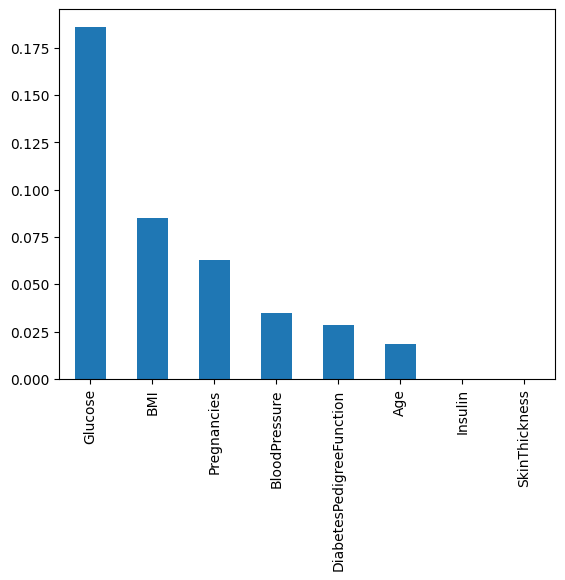

In [10]:
import matplotlib.pyplot as plt
import numpy as np

x = pd.Series(np.abs(lasso.coef_),index=cols)

x.sort_values(ascending=False).plot(kind='bar')

In [11]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)

lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

<Axes: >

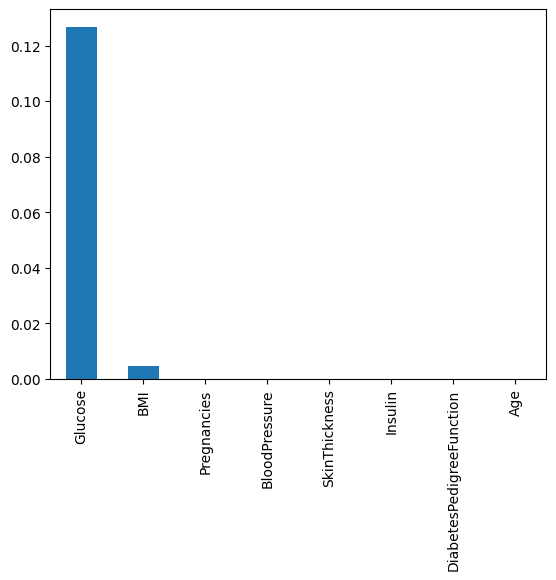

In [12]:
import matplotlib.pyplot as plt
import numpy as np

x = pd.Series(np.abs(lasso.coef_),index=cols)

x.sort_values(ascending=False).plot(kind='bar')

### Feature Selection using Decision Tree

In [13]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=1)

In [16]:
from pandas.core.common import random_state
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

#dt.fit(X_train,y_train)
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [17]:
dt.feature_importances_

array([0.07223402, 0.28243396, 0.10067348, 0.04490558, 0.04682564,
       0.18157152, 0.12079432, 0.15056149])

<Axes: >

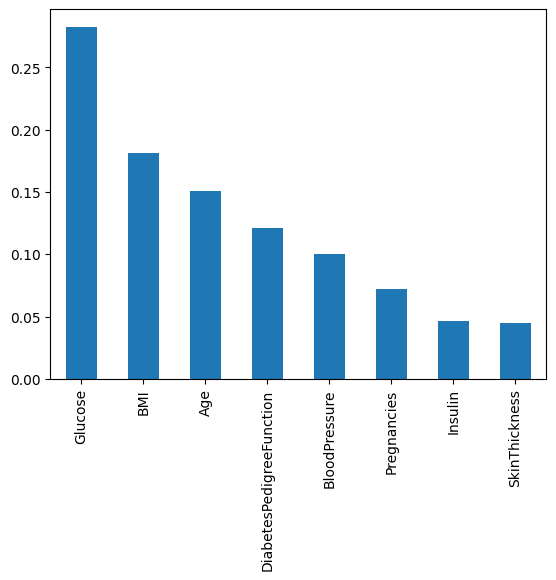

In [19]:
x = pd.Series(np.abs(dt.feature_importances_),index=cols)

x.sort_values(ascending=False).plot(kind='bar')

### SelectFromModel

In [24]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('diabetes.csv')

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=1)

In [25]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [32]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(model, threshold='mean')

In [33]:
sfm.fit(X_train, y_train)

SelectFromModel(estimator=DecisionTreeClassifier(), threshold='mean')

In [34]:
sfm.get_support(indices=True)

array([1, 5, 7], dtype=int64)

In [35]:
sfm.feature_names_in_[sfm.get_support(indices=True)]

array(['Glucose', 'BMI', 'Age'], dtype=object)

In [36]:
X_train_trans = sfm.transform(X_train)

X_train_trans = pd.DataFrame(X_train_trans,columns=sfm.feature_names_in_[sfm.get_support(indices=True)])

X_train_trans

,Glucose,BMI,Age
0,145.0,37.9,40.0
1,129.0,41.2,38.0
2,102.0,37.2,45.0
3,120.0,25.0,64.0
4,120.0,39.7,29.0
...,...,...,...
609,157.0,39.4,30.0
610,187.0,33.9,34.0
611,126.0,43.4,42.0
612,171.0,43.6,26.0


# Recursive Feature Selection

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [4]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X,y)

RandomForestClassifier()

In [6]:
rf.feature_importances_

array([0.09934982, 0.02643063, 0.41355962, 0.46065994])

In [7]:
X.drop(columns='sepal_width',inplace=True)
X.head()

,sepal_length,petal_length,petal_width
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


In [8]:
rf = RandomForestClassifier()
rf.fit(X,y)

rf.feature_importances_

array([0.22091134, 0.43760195, 0.34148671])

In [9]:
X.drop(columns='sepal_length',inplace=True)
X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [10]:
rf = RandomForestClassifier()
rf.fit(X,y)

rf.feature_importances_

array([0.48469676, 0.51530324])

In [11]:
X.drop(columns='petal_length',inplace=True)
X.head()

,petal_width
0,0.2
1,0.2
2,0.2
3,0.2
4,0.2


### Sklearn RFE

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load iris dataset
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
df = pd.read_csv(url)

# Separate features and target variable
X = df.drop("species", axis=1)
y = df["species"]

# Initialize RandomForestClassifier
model = RandomForestClassifier()

# Initialize RFE
rfe = RFE(estimator=model, n_features_to_select=1)

# Fit RFE
rfe.fit(X, y)

# Print the ranking
ranking = rfe.ranking_
print("Feature ranking:")

for i, feature in enumerate(X.columns):
    print(f"{feature}: {ranking[i]}")

Feature ranking:
sepal_length: 3
sepal_width: 4
petal_length: 2
petal_width: 1


# Mutual Info


In [13]:
import pandas as pd

data = {
    'A': ['a1', 'a2', 'a1', 'a1', 'a2', 'a1', 'a2', 'a2'],
    'B': ['b1', 'b2', 'b2', 'b1', 'b1', 'b2', 'b2', 'b1']
}

df = pd.DataFrame(data)


In [14]:
marginal_prob = pd.crosstab(df['A'], df['B'], margins=True, normalize='all')
marginal_prob

B,b1,b2,All
A,,,
a1,0.25,0.25,0.5
a2,0.25,0.25,0.5
All,0.50,0.50,1.0


In [15]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import load_iris
import pandas as pd

# Load iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']

# Compute mutual information
mi = mutual_info_classif(X, y)

# Print mutual information
for i, mi_value in enumerate(mi):
    print(f"Feature {i}: Mutual Information = {mi_value}")

Feature 0: Mutual Information = 0.48870314004953896
Feature 1: Mutual Information = 0.24166880737908958
Feature 2: Mutual Information = 0.9847878076580947
Feature 3: Mutual Information = 0.9810933074295263


In [16]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']

# Create SelectKBest feature selector
selector = SelectKBest(mutual_info_classif, k=2)

# Fit and transform
X_new = selector.fit_transform(X, y)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)

print(iris.feature_names)
print(cols)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[2 3]
